# Pymaceuticals Inc.
---

### Analysis

Capolumin was shown to be similarly effective in the treatment of skin cancer, when compared to Ramicane, and more effective in the treatment of skin cancer, when compared to Infubinol and Ceftamin.
 

In [136]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
%matplotlib inline

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="inner")

# Display the data table for preview
merge_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [137]:
# Checking the number of mice.

mice_total = merge_data["Mouse ID"].nunique()
mice_total

249

In [138]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_mice = merge_data[merge_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice_ids = duplicate_mice["Mouse ID"].unique()
duplicate_mice_ids

array(['g989'], dtype=object)

In [139]:
# Optional: Get all the data for the duplicate mouse ID.

duplicate_mouse_data = merge_data[merge_data["Mouse ID"].isin(duplicate_mice_ids)]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [140]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_data = merge_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [141]:
# Checking the number of mice in the clean DataFrame.

mice_total_clean = clean_data["Mouse ID"].nunique()
mice_total_clean

249

## Summary Statistics

In [142]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_stats = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

summary_df = pd.DataFrame(summary_stats)
summary_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [143]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

def summary_stats_func(x):
    mean = x.mean()
    median = x.median()
    variance = x.var()
    std = x.std()
    sem = x.sem()
    return pd.Series([mean, median, variance, std, sem], index=['mean', 'median', 'var', 'std', 'sem'])

summary_stats_table = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(summary_stats_func)

summary_stats_table

Drug Regimen        
Capomulin     mean      40.675741
              median    41.557809
              var       24.947764
              std        4.994774
              sem        0.329346
Ceftamin      mean      52.591172
              median    51.776157
              var       39.290177
              std        6.268188
              sem        0.469821
Infubinol     mean      52.884795
              median    51.820584
              var       43.128684
              std        6.567243
              sem        0.492236
Ketapril      mean      55.235638
              median    53.698743
              var       68.553577
              std        8.279709
              sem        0.603860
Naftisol      mean      54.331565
              median    52.509285
              var       66.173479
              std        8.134708
              sem        0.596466
Placebo       mean      54.033581
              median    52.288934
              var       61.168083
              std        7.

## Bar and Pie Charts

<Axes: title={'center': 'Total Number of Rows for Each Drug Regimen'}, xlabel='Drug Regimen', ylabel='Total Number of Rows'>

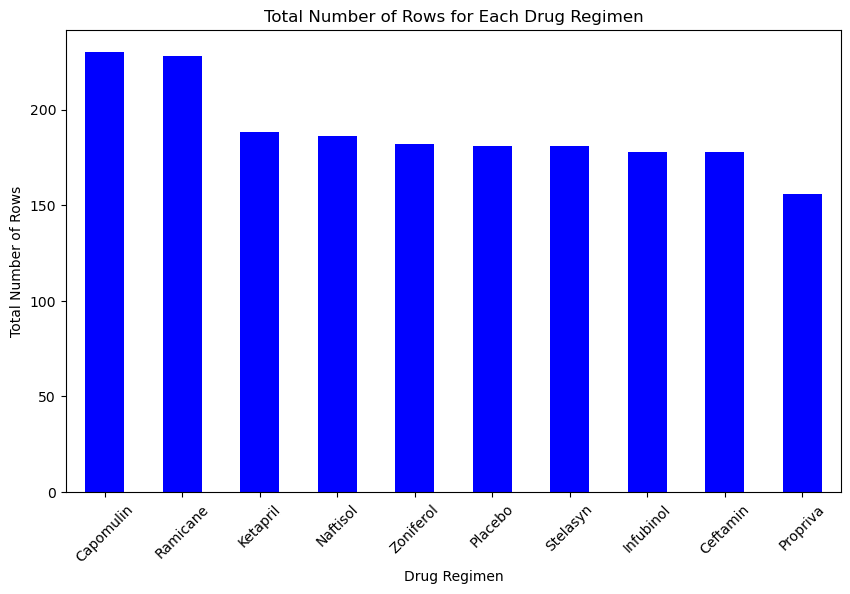

In [144]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = clean_data['Drug Regimen'].value_counts()
drug_regimen_counts.plot(kind='bar', color='blue', title='Total Number of Rows for Each Drug Regimen',
						 xlabel= 'Drug Regimen', ylabel= 'Total Number of Rows', figsize=(10, 6), rot=45)


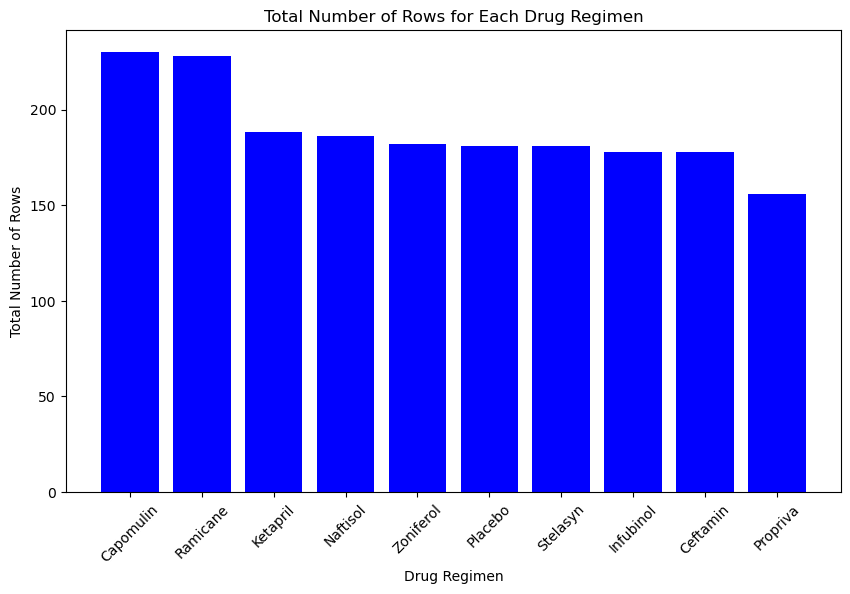

In [145]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(10, 6))
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values, color='blue')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Rows')
plt.xticks(rotation=45)

plt.show()


<Axes: title={'center': 'Distribution of Unique Female vs. Male Mice'}, ylabel='count'>

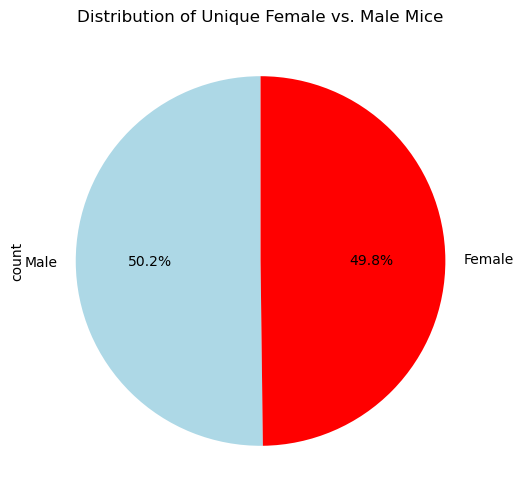

In [146]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
gender_counts = unique_mice['Sex'].value_counts()

# Create a pie chart using Pandas
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'red'], 
				   title = 'Distribution of Unique Female vs. Male Mice', figsize=(6, 6), startangle=90)


Text(0, 0.5, '')

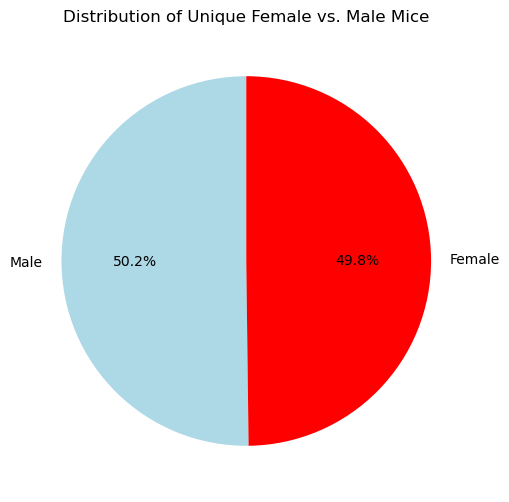

In [147]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_counts = unique_mice['Sex'].value_counts()

# Make the pie chart
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'red'], figsize=(6, 6), startangle=90)
plt.title('Distribution of Unique Female vs. Male Mice')
plt.ylabel('')

## Quartiles, Outliers and Boxplots

In [148]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = clean_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_data = pd.merge(max_timepoints, clean_data, on=['Mouse ID', 'Timepoint'], how='left')

selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = final_tumor_volume_data[final_tumor_volume_data['Drug Regimen'].isin(selected_regimens)]
final_tumor_volume

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
239,y769,45,Ceftamin,Female,6,27,68.594745,4
240,y793,45,Capomulin,Male,17,17,31.896238,2
241,y865,45,Ceftamin,Male,23,26,64.729837,3
245,z578,45,Ramicane,Male,11,16,30.638696,0


In [149]:
# Put treatments into a list for a for loop
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to fill with tumor volume data for plotting
tumor_volume_data = []

# Loop through each treatment regimen to calculate the IQR and determine potential outliers
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset to the list
    tumor_volume_data.append(tumor_volumes)
    
    # Calculate the quartiles and IQR
    quartiles = tumor_volumes.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    print(f"{treatment}'s potential outliers: {outliers}")
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


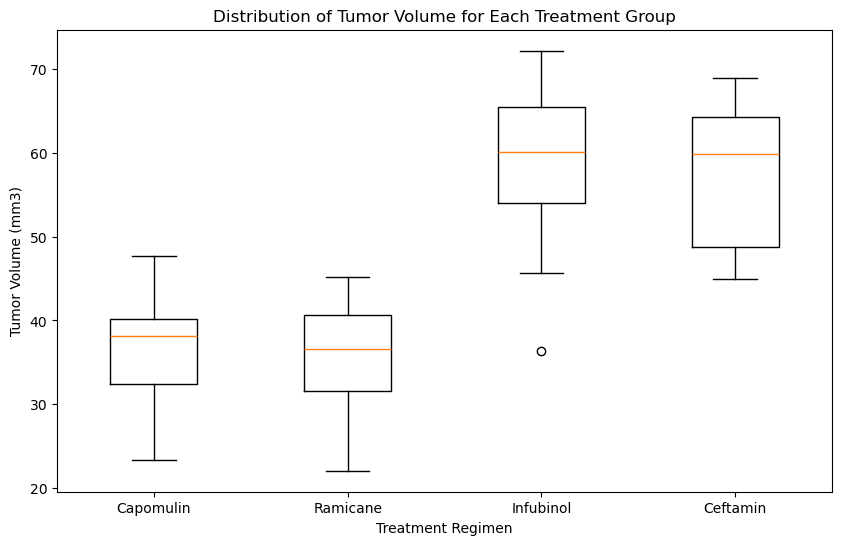

In [150]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
tumor_volume_data = [final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] 
											== treatment, 'Tumor Volume (mm3)'] for treatment in treatments]

plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volume_data, labels=treatments)

plt.xlabel('Treatment Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')

plt.show()

## Line and Scatter Plots

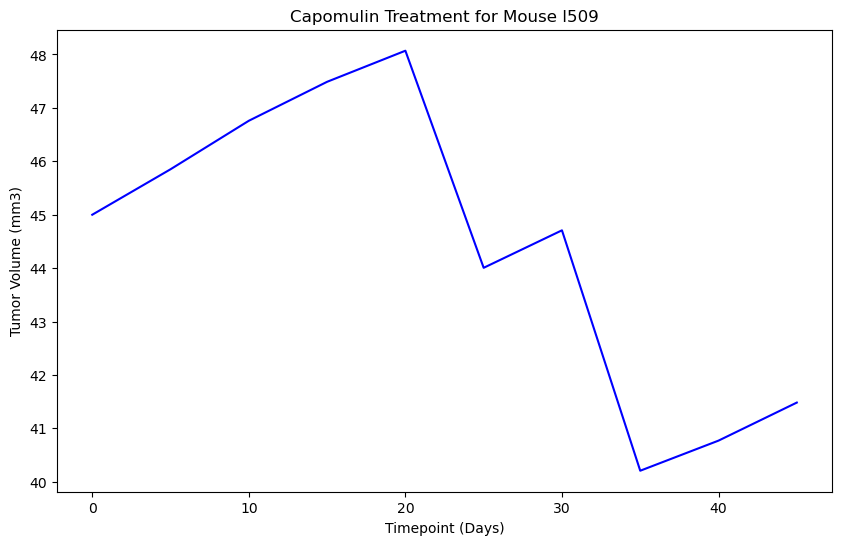

In [151]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509' #Enter specific mouse ID that you want to plot (ex: l509)
capomulin_data = clean_data.loc[(clean_data['Drug Regimen'] == 'Capomulin') & (clean_data['Mouse ID'] == mouse_id)]

plt.figure(figsize=(10, 6))
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], color='b', label=f'Mouse {mouse_id}')

plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin Treatment for Mouse {mouse_id}')

plt.show()

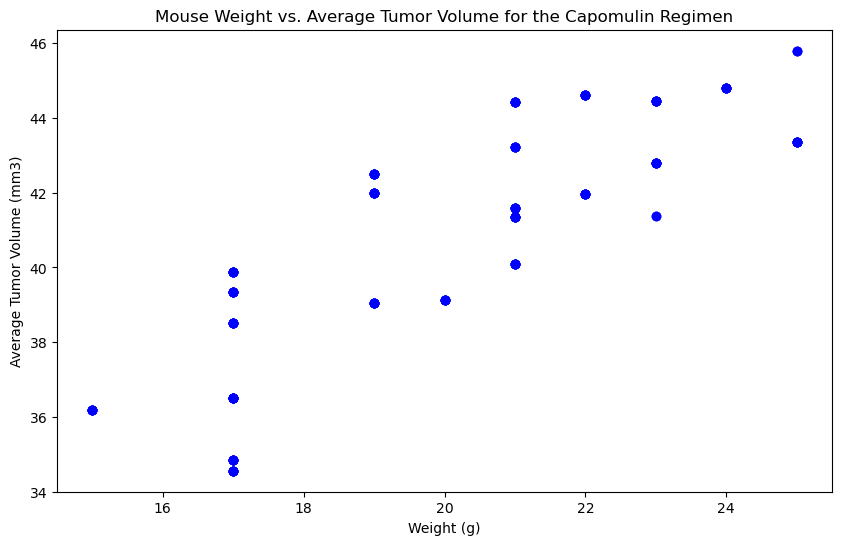

In [152]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_avg_tumor_volume = clean_data.loc[clean_data['Drug Regimen'] 
											== 'Capomulin'].groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

capomulin_data = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']
capomulin_merged = pd.merge(capomulin_data, capomulin_avg_tumor_volume, on='Mouse ID', suffixes=('', '_avg'))

plt.figure(figsize=(10, 6))
plt.scatter(capomulin_merged['Weight (g)'], capomulin_merged['Tumor Volume (mm3)_avg'], color='b', alpha=0.7)

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for the Capomulin Regimen')

plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is: 0.8343958614425967


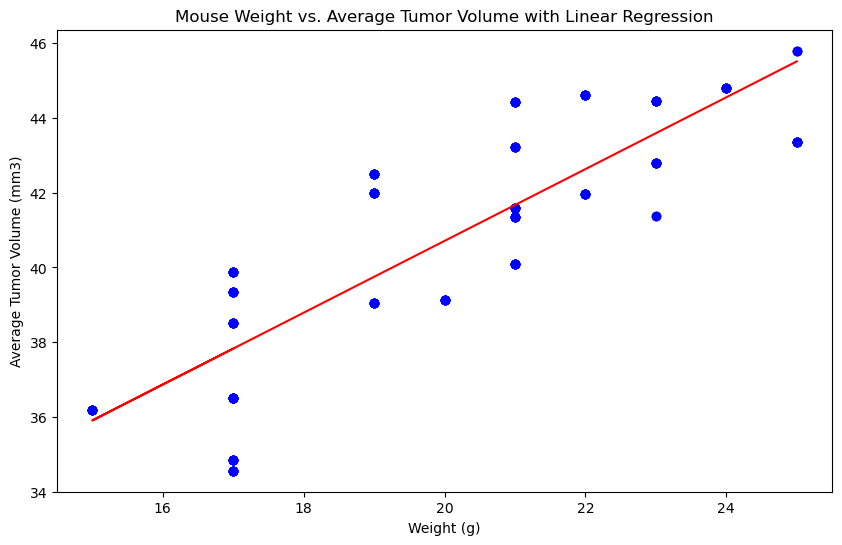

In [153]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(capomulin_merged['Weight (g)'], capomulin_merged['Tumor Volume (mm3)_avg'])
print(f"The correlation coefficient between mouse weight and average tumor volume is: {correlation[0]}")

slope, intercept, r_value, p_value, std_err = st.linregress(capomulin_merged['Weight (g)'], capomulin_merged['Tumor Volume (mm3)_avg'])

plt.figure(figsize=(10, 6))
plt.scatter(capomulin_merged['Weight (g)'], capomulin_merged['Tumor Volume (mm3)_avg'], color='b', alpha=0.7)
plt.plot(capomulin_merged['Weight (g)'], slope * capomulin_merged['Weight (g)'] + intercept, color='r')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume with Linear Regression')

plt.show()
